# EduTrends
* Fermin Garcia

## Imports

In [1]:
#import data tools
import numpy as np
import pandas as pd
# import data acquisition functions
import wrangle as w
# import exploration visualizations
import explore as e
# import ML models
import modeling as m
# import statistic tools
from scipy import stats

## Acquire

* The data was acquired from Kaggle [https://www.kaggle.com/datasets/desalegngeb/students-exam-scores ]
* The data was downloaded as csv files and combined into one csv locally
* Each row represents a student 
* Each column represents one aspect the students life

In [2]:
# Import acquired messy data from your acquire file here
df = w.acquire_edu_data()

## Prepare

* We standardize our columns by removing spaces, commas, and standardizing the strings to all lowercase.
* With null values we decided to use sklearn imputer to fill in the blank,as every row repsersents a student and to drop any null values is a to drop a students voice. 
* New columns were created to a final score column that was the final score for the student. This column was created to based of the average of the students reading, writing and math score. Risk category was created to identify risk group for students. This columns was created using kmeans clusetering to find natual patterns in our final grade sample and we were able to identify three distict groups and use those to assign risk categories. 
* The dataset was split into train, validate and test groups (56%, 24%, 20%)

In [3]:
# Import your prepare function and use it to clean your data here
train, validate, test = w.wrangle()

## Explore

* Does parent's education have an effect on a students risk category?
* Does a students lunch status (free/reduce/standard) affect risk category ?
* Does completing a test prep affect risk category?
* Since the risk category is a dirivitive of final score, I used final score to explore the features that contribute most to the final score column
* insert questions here!!!

## Question - Does parent's education have an effect on a students risk category?

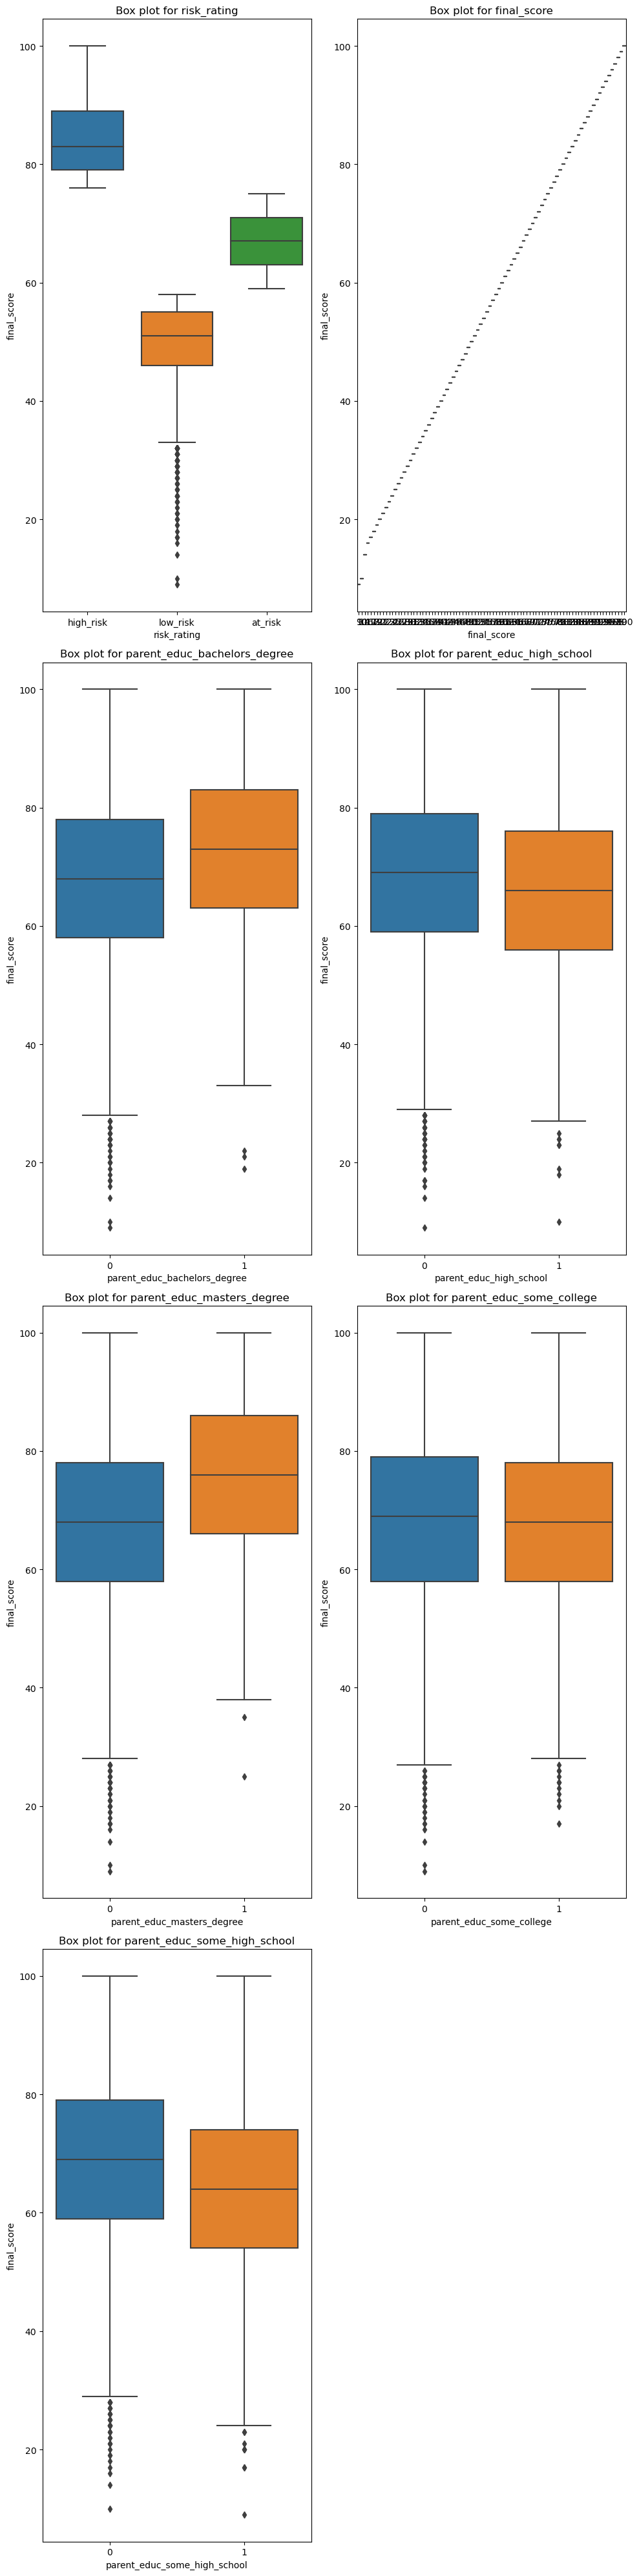

In [4]:
# display a plot of alcohol content by quality
e.get_parents_edu_plot(train)

#### Is there a statistial correlation?
- There seems to be a visual difference between the education.
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between parents education and final score
- α = 0.05

In [5]:
# run a statistical test on alcohol and quality
e.kruskal_wallis_test(train, alpha=0.05)

Kruskal-Wallis test statistic: 753.4311904529943
Kruskal-Wallis test p-value: 9.36829726158263e-162


'There is a statistically significant difference in final scores among the different parental education groups.'

#### We are able to conclude that there is correlation between parents edu and final score. 

## Question - Does a students lunch status (free/reduce/standard) affect risk category ?

Shapiro-Wilk test p-value for free/reduced lunch students: 8.851850363811309e-10
Shapiro-Wilk test p-value for standard lunch students: 1.2070278669252559e-23


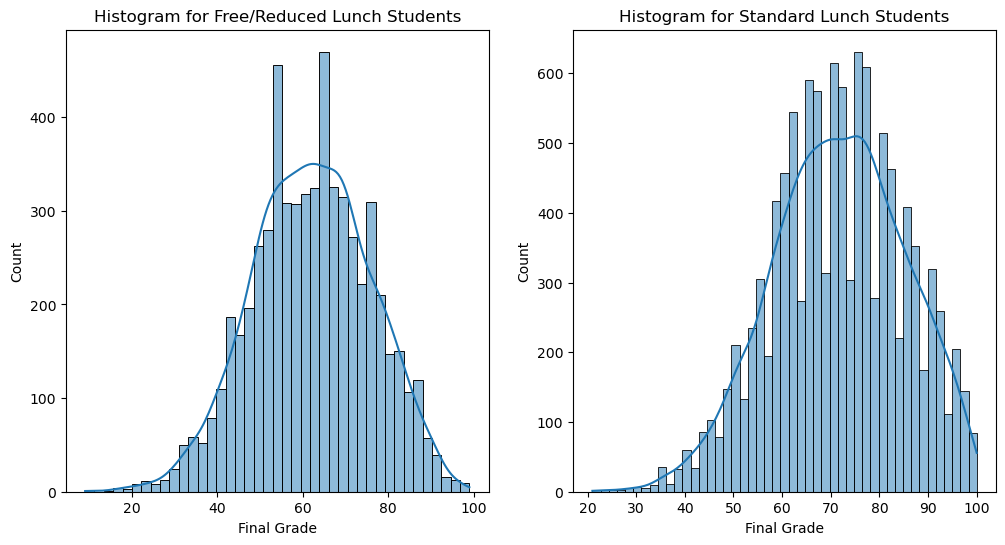

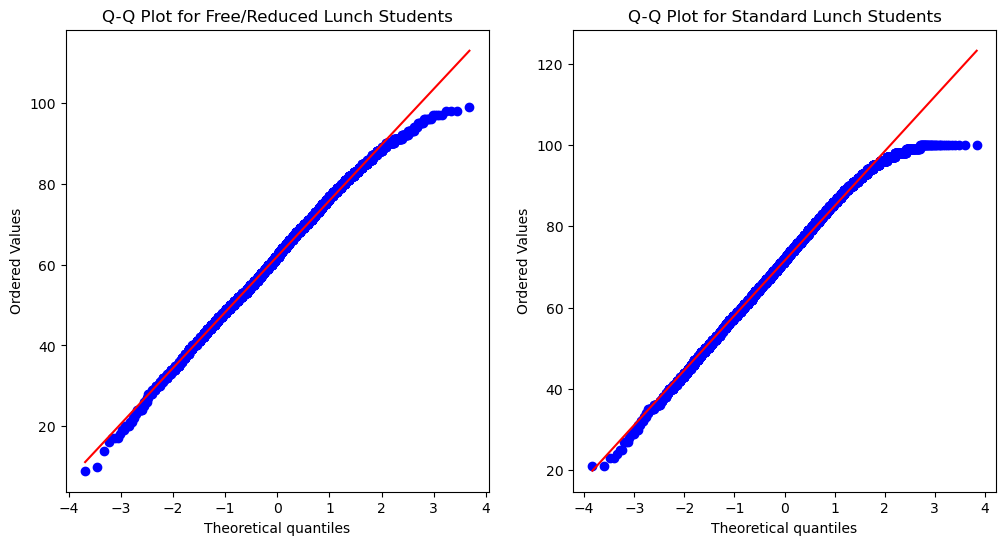

Levene's test p-value: 0.09633852496726257


In [6]:
e.lunch_visual(train)

In [7]:
e.testing_lunch(df=train)

Mann-Whitney U test statistic: 20966523.5
Mann-Whitney U test p-value: 0.0
Reject the null hypothesis


#### We are able to conclude that there is a  correlation between free/reduce lunch  and final score.

### Data Analysis: Comparing Final Scores Between Free/Reduced Lunch Students and Standard Lunch Students

#### Assign Significance Level (Alpha)
alpha = 0.05

#### Assumption Checks

##### Shapiro-Wilk Test for Normality
- Free/reduced lunch students: p-value = 8.85e-10
- Standard lunch students: p-value = 1.21e-23

Both p-values are smaller than the chosen alpha (0.05), indicating that the final scores for both groups are not normally distributed. The normality assumption is violated.

##### Levene's Test for Homogeneity of Variances
- p-value = 0.0963

The p-value is greater than the chosen alpha (0.05), indicating that we cannot conclude there is a significant difference in variances between the two groups. The assumption of equal variances seems reasonable.

#### Appropriate Hypothesis Test: Mann-Whitney U Test

Mann-Whitney U test statistic: 66,887,488
Mann-Whitney U test p-value: 0.0

The p-value is smaller than the chosen alpha (0.05), which means you can reject the null hypothesis. The results suggest that there is a significant difference in final scores between the two groups of students (free/reduced lunch students and standard lunch students).

### Conclusion

Due to the violation of the normality assumption, we used the Mann-Whitney U test to compare the final scores between the two groups. The results indicate that there is a significant difference in final scores between free/reduced lunch students and standard lunch students. Further analysis (e.g., comparing the median scores of the two groups) can help understand the nature of this difference.


## Question - Does completing a test prep affect risk category??

In [8]:
# display a plot of chlorides by quality
# e.get_plot_chlorides_by_quality(train)

#### Is there a statistial correlation?
- chlorides is a continuous variable
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and chlorides
- α = 0.05

In [9]:
# run a statistical test on chlorides and quality
# e.check_hypothesis(train, 'quality', 'chlorides', test=stats.spearmanr)

#### We are able to conclude that there is a linear correlation between quality and chlorides, with a correlation coefficient of -0.30 (as chlorides goes up, quality goes down)

## Exploration Summary
## Free/Reduced Lunch vs. Standard Lunch
- Shapiro-Wilk test indicated that both groups are not normally distributed.
- Levene's test indicated that the groups have equal variances.
- Due to the violation of the normality assumption, we used the Mann-Whitney U test.
- Mann-Whitney U test showed a statistically significant difference in final scores between students with free/reduced lunch and standard lunch.

## Parental Education Levels
- Shapiro-Wilk test indicated that all parental education level groups are not normally distributed.
- Levene's test indicated that the groups have equal variances.
- Due to the violation of the normality assumption, we used the Kruskal-Wallis test.
- Kruskal-Wallis test showed a statistically significant difference in final scores among different parental education levels.

## Test Preparation Course Completion
- Shapiro-Wilk test indicated that both groups (test preparation course completed and not completed) are not normally distributed.
- Levene's test indicated that the groups have equal variances.
- Due to the violation of the normality assumption, we used the Mann-Whitney U test.
- Mann-Whitney U test showed a statistically significant difference in final scores between students who completed the test preparation course and those who didn't.

## Modeling

### Introduction
* Since we are predictiing a classification here are the metrics for classification models. :
   
   
       Precision: The ratio of true positive predictions to the total number of positive predictions. It represents the model's ability to correctly identify only the relevant instances. A high precision means low false positive rate.


        Recall (Sensitivity): The ratio of true positive predictions to the total number of actual positive instances. It represents the model's ability to identify all relevant instances. A high recall means low false negative rate.


        F1-score: The harmonic mean of precision and recall. It provides a single value that balances both precision and recall, making it a useful metric when both false positives and false negatives are important.


        Support: The number of occurrences of each class in the dataset. It helps to give an idea of the class distribution and the number of samples on which the metrics are calculated.

        Accuracy: The ratio of correctly classified instances to the total number of instances. It is a common metric for classification problems but can be misleading if the class distribution is imbalanced.


        Macro-average: The mean of the metric (e.g., precision, recall, F1-score) calculated independently for each class, then averaged. It treats all classes equally, regardless of their distribution.

        Weighted-average: The mean of the metric (e.g., precision, recall, F1-score) calculated independently for each class, then averaged with weights proportional to the number of instances in each class. This accounts for class imbalance.

In [10]:
# split train, validate and test into X and y variable groups
X_train, y_train, X_validate, y_validate, X_test, y_test = m.modeling_split(train,validate,test)

### Baseline Model
- Calculated by geting the mode of risk rating from the training dataset
- The baseline model predicts a quality rating of low risk for all students.

| Class      | Precision | Recall | F1-score | Support |
|------------|-----------|--------|----------|---------|
| at_risk    | 0.00      | 0.00   | 0.00     | 3978    |
| high_risk  | 0.00      | 0.00   | 0.00     | 7645    |
| low_risk   | 0.32      | 1.00   | 0.49     | 5530    |
|------------|-----------|--------|----------|---------|
| accuracy   |           |        | 0.32     | 17153   |
| macro avg  | 0.11      | 0.33   | 0.16     | 17153   |
| weighted avg | 0.10    | 0.32   | 0.16     | 17153   |



### Best 3 Models
* Our best models were descion tree, KNN, and random forest, and Generalized Linear Model
* We performed tests using feature sets derived from the KBest and Recursive Feature Elimination algorithms

### Descion Tree 

    Train Data:

|            | Precision | Recall | F1-score | Support |
|------------|-----------|--------|----------|---------|
| at_risk    | 0.59      | 0.11   | 0.19     | 3978    |
| high_risk  | 0.47      | 0.80   | 0.59     | 7645    |
| low_risk   | 0.56      | 0.35   | 0.43     | 5530    |
|------------|-----------|--------|----------|---------|
| accuracy   |           |        | 0.49     | 17153   |
| macro avg  | 0.54      | 0.42   | 0.40     | 17153   |
| weighted avg | 0.53    | 0.49   | 0.45     | 17153   |


    Validate date:

|            | Precision | Recall | F1-score | Support |
|------------|-----------|--------|----------|---------|
| at_risk    | 0.57      | 0.10   | 0.17     | 1775    |
| high_risk  | 0.46      | 0.80   | 0.59     | 3246    |
| low_risk   | 0.55      | 0.35   | 0.43     | 2331    |
|------------|-----------|--------|----------|---------|
| accuracy   |           |        | 0.49     | 7352    |
| macro avg  | 0.53      | 0.41   | 0.39     | 7352    |
| weighted avg | 0.52    | 0.49   | 0.43     | 7352    |


    Test Data

|            | Precision | Recall | F1-score | Support |
|------------|-----------|--------|----------|---------|
| at_risk    | 0.58      | 0.11   | 0.18     | 1437    |
| high_risk  | 0.46      | 0.80   | 0.58     | 2698    |
| low_risk   | 0.55      | 0.33   | 0.42     | 1992    |
|------------|-----------|--------|----------|---------|
| accuracy   |           |        | 0.48     | 6127    |
| macro avg  | 0.53      | 0.41   | 0.39     | 6127    |
| weighted avg | 0.52    | 0.48   | 0.43     | 6127    |


In [ ]:
# retrieve a polynomial model and metrics using the kbest feature set
lm2_rfe, X_train_degree2_rfe, X_validate_degree2_rfe, X_test_degree2_rfe = \
    m.get_model_polynomial(X_train, X_validate, X_test,
                           y_train, y_validate, y_test,
                           f_features_rfe)

### Test Model
* We chose to use the Descion Tree model. 
* This model had both the higest recall score when identifying students in high-risk categories

    A recall score of 0.80 means that out of all the actual positive instances in the dataset, the model was able to correctly identify 80% of them. In other words, the model was able to capture 80% of the true positive cases while the remaining 20% were classified as false negatives (i.e., they were positive but classified as negative by the model). A high recall score indicates that the model has a low false negative rate, which is desirable when it's important not to miss positive cases.

### Modeling Wrap 
* Our best model (descion tree) was able to accuratley identify 80% of students in high risk category 
* On the test data, our recall was 0.80
* Our model performed better than the baseline in metrics

## Conclusion

### Summary
* Our model was able to predict the a student in a high risk category with about 80% recall. 
* from what we saw test prep and parents education played important features in this analysis.


### Recommendations
* Use this model to identify students in high risk categories. 
* From here we can create focus groups and fund additional resousources for those students to succeed. 


### Next Steps
* To break down this analysis and see if we can find more contributors that werent touched on 